## L'hiver arrive. Chargeons le jeu de données dès que possible!
<p>Si vous n'avez pas entendu parler de <em>Game of Thrones</em>, alors vous devez vraiment bien vous cacher. Game of Thrones est la série télévisée extrêmement populaire de HBO basée sur la série de livres (également) extrêmement populaire <em>A Song of Ice and Fire</em> de George R.R. Martin. Dans ce cahier, nous analyserons le réseau de co-occurrence des personnages des livres Game of Thrones. Ici, deux personnages sont considérés comme co-apparaissant si leurs noms apparaissent à proximité de 15 mots l'un de l'autre dans les livres.</p>
<p><img src="datasets/got_network.jpeg" style="width: 550px"></p>
<p>Cet ensemble de données constitue un réseau et est donné sous forme de fichier texte décrivant les <em>arêtes</em> entre les personnages, avec certains attributs attachés à chaque arête. Commençons par charger les données du premier livre <em>A Game of Thrones</em> et inspectons-le.</p>

In [2]:
# Importing modules
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv("datasets/book1.csv")

# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


## Il est temps pour un réseau de trônes
<p>Le <code>book1</code> DataFrame résultant a 5 colonnes: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code> et <code>livre</code>. La source et la cible sont les deux nœuds liés par une arête. Un réseau peut avoir des bords dirigés ou non dirigés et dans ce réseau, tous les bords sont non dirigés. L'attribut de poids de chaque bord nous indique le nombre d'interactions que les personnages ont eu sur le livre, et la colonne du livre nous indique le numéro du livre.</p>
<p>Une fois que nous avons chargé les données en tant que DataFrame pandas, il est temps de créer un réseau. Nous utiliserons <code>networkx</code>, une bibliothèque d'analyse de réseau, et créerons un objet graphique pour le premier livre.</p>

In [3]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

## Remplissez le réseau avec le DataFrame
<p>Actuellement, l'objet graphique <code>G_book1</code> est vide. Remplissons-le maintenant avec les bords de <code>book1</code>. Et pendant que nous y sommes, chargeons aussi le reste des livres!</p>

In [4]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## Le personnage le plus important de Game of Thrones
<p>Est-ce Jon Snow, Tyrion, Daenerys ou quelqu'un d'autre? Voyons voir! La science des réseaux nous offre de nombreuses métriques différentes pour mesurer l'importance d'un nœud dans un réseau. Notez qu'il n'y a pas de manière "correcte" de calculer le nœud le plus important dans un réseau, chaque métrique a une signification différente.</p>
<p>Tout d'abord, mesurons l'importance d'un nœud dans un réseau en examinant le nombre de voisins qu'il possède, c'est-à-dire le nombre de nœuds auxquels il est connecté. Par exemple, un compte influent sur Twitter, où la relation suiveur-abonné forme le réseau, est un compte qui compte un grand nombre d'abonnés. Cette mesure d'importance est appelée <em>centralité des degrés</em>.</p>
<p>En utilisant cette mesure, extrayons les dix premiers personnages importants du premier livre (<code>book[0]</code>) et du cinquième livre (<code>book[4]</code>).</p>

In [5]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1, sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)] [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## L'évolution de l'importance du personnage
<p>Selon la centralité des degrés, le personnage le plus important du premier livre est Eddard Stark, mais il n'est même pas dans le top 10 du cinquième livre. L'importance des personnages change au cours de cinq livres parce que, vous savez, il se passe des choses ...;)</p>
<p>Examinons l'évolution de la centralité des degrés des personnages comme Eddard Stark, Jon Snow et Tyrion, qui figurait dans le top 10 de la centralité des degrés dans le premier livre.</p>

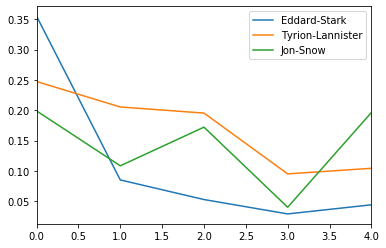

In [7]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## Quoi de neuf avec Stannis Baratheon?
<p>Nous pouvons voir que l'importance d'Eddard Stark s'éteint à mesure que la série de livres progresse. Avec Jon Snow, il y a une baisse dans le quatrième livre mais une hausse soudaine dans le cinquième livre.</p>
<p>Examinons maintenant diverses autres mesures comme la <em>centralité de l'interdépendance</em> et le <em>PageRank</em> pour trouver des personnages importants dans notre réseau de co-occurrence de personnages de Game of Thrones et voir si nous pouvons découvrir des faits plus intéressants à propos de ce réseau. Tracons l'évolution de la centralité de l'interdépendance de ce réseau sur les cinq livres. Nous allons prendre l'évolution des quatre premiers personnages de chaque livre et la tracer.</p>

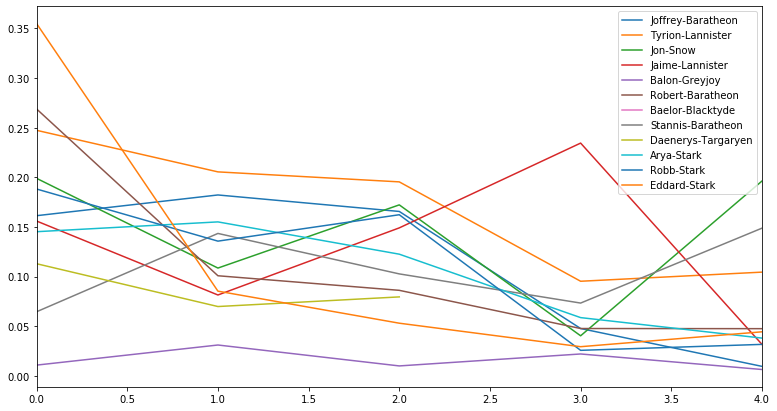

In [8]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
degree_evol_df[list_of_char].plot(figsize=(13, 7))

## Que nous dit Google PageRank sur GoT?
<p>Nous voyons une augmentation particulière de l'importance de Stannis Baratheon sur les livres. Dans le cinquième livre, il est significativement plus important que les autres personnages du réseau, même s'il est le troisième personnage le plus important selon la centralité des degrés.</p>
<p>PageRank était la première façon dont Google classait les pages Web. Il évalue les liens entrants et sortants des pages Web sur le World Wide Web, qui est essentiellement un réseau dirigé. Examinons l'importance des personnages dans le réseau Game of Thrones selon PageRank.</p>

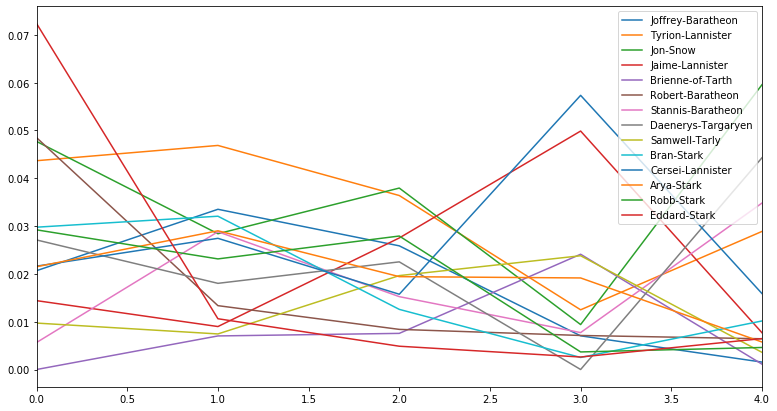

In [9]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

## Corrélation entre différentes mesures
<p>Stannis, Jon Snow et Daenerys sont les personnages les plus importants du cinquième livre selon PageRank. Eddard Stark suit une courbe similaire mais pour la centralité des degrés et la centralité entre les deux: il est important dans le premier livre mais meurt dans l'oubli au cours de la série de livres.</p>
<p>Nous avons vu trois mesures différentes pour calculer l'importance d'un nœud dans un réseau, et toutes nous disent quelque chose sur les personnages et leur importance dans le réseau de cooccurrence. Nous voyons certains noms apparaître dans les trois mesures, alors peut-être qu'il y a une forte corrélation entre eux?</p>
<p>Examinons la corrélation entre le PageRank, la centralité entre les différences et la centralité des degrés pour le cinquième livre utilisant la corrélation de Pearson.</p>

In [10]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


## Conclusion
<p>Nous voyons une forte corrélation entre ces trois mesures pour notre réseau de co-occurrence de personnages.</p>
<p>Nous avons donc cherché différentes façons de trouver les personnages importants du réseau de cooccurrence Game of Thrones. Selon la centralité des degrés, Eddard Stark est le personnage le plus important au départ dans les livres. Mais qui est/sont le(s) personnage(s) le plus important(s) dans le cinquième livre selon ces trois mesures?</p>

In [11]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
#p_rank, b_cent, d_cent = ...
cor.T.idxmax(axis=0)[0], cor.T.idxmax(axis=0)[1]
# Printing out the top character accoding to the three measures
# ... YOUR CODE FOR TASK 9 ...

('Jon-Snow', 'Stannis-Baratheon')